# Import packages

In [25]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import inspect
from collections import namedtuple
import sys
from pyprojroot import here
import feather
root = here()
sys.path.append(str(root))
wdir = root / "data" / "interim" / "tides"
from tidal_flat_0d import models, features, visualization
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

# Import data

In [26]:
tide_name = "tides-debug.feather"
tide_series = features.load_tide(wdir, tide_name)

index = tide_series.pressure.index
water_height = tide_series.pressure.values

# Make functions

## Turn tide data into functions for height and gradient

In [27]:
tide_func = interp1d(np.arange(1,len(index)+1,1), water_height, bounds_error=False, fill_value="extrapolate")
dhdt = np.gradient(water_height)
dhdt_func = interp1d(np.arange(0,len(index),1), dhdt, bounds_error=False, fill_value="extrapolate")

## Concentration function using Runge-Kutta Method

In [28]:
def calc_conc(t, y, bound_conc, settle_rate, bulk_dens):

    init_conc = y[0]
    init_elev = y[1]
    water_height = tide_func(t)
    dhdt = dhdt_func(t)
    depth = water_height - init_elev

    # Checks
    tide_increasing = dhdt > 0

    if tide_increasing:
        delta_conc = - (settle_rate * init_conc) / depth - 1 / depth * (init_conc - bound_conc) * dhdt
        if init_conc + delta_conc < 0:
            delta_conc = - init_conc
        delta_elev = settle_rate * new_conc * t
        return dy
    if not tide_increasing:
        dy = - (settle_rate * y) / depth
        if y + dy < 0:
            dy = -y
        return dy
    else:
        raise Exception('Tide not increasing or decreasing.')

# Set parameters and run model for one cycle

In [32]:
grain_dia = 0.000035  # grain diameter (m)
grain_den = 2650
settle_rate = models.stokes_settling(grain_dia=grain_dia, grain_den=grain_den)
init_conc = 0
bound_conc = 0.8
elev = 0

t_span = np.arange(1,len(index), 1)

conc = solve_ivp(fun=calc_conc, t_span=[t_span[0], t_span[-1]], y0=[0,0], args=(bound_conc, elev, settle_rate))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Plot results

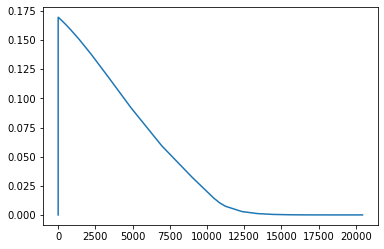

In [30]:
plt.plot(conc.t,conc.y[0])

array([1.00000000e+00, 1.00010000e+00, 1.00110000e+00, 1.01110000e+00,
       1.09291255e+00, 1.21449220e+00, 1.38067704e+00, 1.60970077e+00,
       1.93352840e+00, 2.41015105e+00, 3.14992524e+00, 4.37979386e+00,
       6.61359621e+00, 1.11548122e+01, 2.16009742e+01, 4.60836360e+01,
       1.07821450e+02, 2.41830309e+02, 4.70172309e+02, 8.40642374e+02,
       1.41527610e+03, 2.24010585e+03, 3.37279378e+03, 4.90302266e+03,
       6.96425965e+03, 9.02549664e+03, 1.04602807e+04, 1.08540635e+04,
       1.12478463e+04, 1.23493568e+04, 1.33942923e+04, 1.44414390e+04,
       1.54926563e+04, 1.57899220e+04, 1.60871876e+04, 1.64368858e+04,
       1.67865841e+04, 1.71408836e+04, 1.74951832e+04, 1.78519800e+04,
       1.82087768e+04, 1.85553146e+04, 1.89018524e+04, 1.92021394e+04,
       1.95024264e+04, 1.96094149e+04, 1.97164033e+04, 1.98635226e+04,
       2.00106420e+04, 2.00663375e+04, 2.01220330e+04, 2.01880264e+04,
       2.02540198e+04, 2.02933477e+04, 2.03326757e+04, 2.03565405e+04,
      